In [1]:
# 자료형 처리
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame

In [ ]:
tips=sns.load_dataset("tips")
tips

In [ ]:
tips.info()

In [ ]:
tips['sex_str']=tips.sex.astype(str)

In [ ]:
tips.dtypes

In [ ]:
tsm=tips.head(10)
tsm.loc[[1,3,5,7], 'total_bill']='missing'
tsm

In [ ]:
tsm.dtypes

In [ ]:
# tsm['total_bill'].astype(float)
# pd.to_numeric(tsm['total_bill'])
tsm['total_bill']=pd.to_numeric(tsm['total_bill'], errors='raise')
# errors = ignore => error 나는 부분 무시하고 실행
# errors = coerce => 숫자로 변환할 수 없는 값은 NaN으로 지정
# errors = raise => default값 / 숫자로 변환할 수 없는 값이 있으면 에러 발생

In [ ]:
tsm.dtypes

In [ ]:
tips['sex']=tips['sex'].astype('category') # str보다 category가 용량을 더 작게 잡아먹음
tips.info()

In [ ]:
word='hello'
sent='world'
sent[-1]
sent[0:3]
sent[2:-1]
word[::2]

In [ ]:
# "Hello World".capitalize() # 첫번쨰 글자를 대문자로 만드는 함수
# "Hello World".count('o')
# "Hello World".startswith("H") # ~~으로 시작하는지 확인
# "Hello World".endswith("World")
# "Hello World".find('l')
# "Hello World".index('l')
# "Hello World".find('z') # -1
# "Hello World".index('z') # error
"Hello World".isalpha() # 알파벳으로만 구성되어 있느냐? => 공백이 있어서 error 발생
"HelloWorld".isalpha()
'130'.isdecimal()
"i'm 25".isdecimal()
"Hello World".lower()
"Hello World".upper()

"Hello World".replace('Hello', 'Hi')
'  Hello World  '.strip()
'Hi Hi Hi'.split(sep=" ")
"9".zfill(with=5)

In [ ]:
# join:문자열 연결
d1="40"
d2='50'
d3='60'
d4='Number'
" ".join([d1,d2,d3,d4])

In [ ]:
# splitlines : 여러 줄로 구성된 문자열을 분리
mystr="""
A:Hello
B:Hi
A:How are you?
B:Fine
"""
msr=mystr.splitlines()
msr

In [ ]:
msr2=msr[::2]
msr2

In [ ]:
a='hi'
s='hello {}'
s.format(a)

In [ ]:
myhome="lacation : {lat}, {lon}"
myhome.format(lat='36', lon='125')

In [ ]:
s="%d digits of pi" % 3

In [ ]:
s

In [ ]:
print("some digits of %(cs)s: %(val).2f" % {'cs':2, 'val':2.78})

In [ ]:
# apply 메서드
df=pd.DataFrame({'a':[1,2,3], 'b':[2,3,4]})
df

In [ ]:
def my_sq(x):
    return x**2

def my_exp(x,n):
    return x**n

In [ ]:
df['a'].apply(my_sq)
df['a'].apply(my_exp, n=df.b)

In [ ]:
def print_me(x):
    print(x)

In [ ]:
# print(df.apply(print_me)) # axis=0 default
print(df.apply(print_me, axis=1)) 

In [ ]:
def myavg(x,y,z):
    return (x+y+z)/3

def myavg_apply(data):
    x=data[0]
    y=data[1]
    z=data[2]
    print(x,y,z)
    return (x+y+z)/3

def myavg_apply2(data):
    sum=0
    for item in data:
        sum+=item
    return sum/df.shape[0]

In [ ]:
# df.apply(myavg)
# df.apply(myavg_apply2)
df.apply(myavg_apply2, axis=1)

In [ ]:
df

In [ ]:
titanic=sns.load_dataset("titanic")
# titanic.info()

def count_missing(vec):
    # 누락값의 개수 리턴
    nv=pd.isnull(vec)
    nc=np.sum(nv)
    return nc

def prop_missing(vec):
    # 누락값의 비율을 출력
    num=vec.size
    miss=count_missing(vec)
    return (miss/num)*100

def prop_complete(vec):
    return 100-prop_missing(vec)

In [ ]:
cm=titanic.apply(count_missing)
print(cm)
# 각 컬럼별 누락값의 개수가 모두 출력
pm=titanic.apply(prop_missing)
print(pm)

pc=titanic.apply(prop_complete)
print(pc)

In [ ]:
# 행 방향으로 누락값의 개수/비율 조사
cmr=titanic.apply(count_missing, axis=1)
pmr=titanic.apply(prop_missing, axis=1)
pcr=titanic.apply(prop_complete, axis=1)

print(cmr, pmr, pcr)

In [ ]:
titanic['num_missing']=titanic.apply(count_missing, axis=1)
titanic

In [ ]:
# num missing 값이 1보다 큰 행을 추출
titanic.loc[titanic.num_missing>1]
titanic.loc[titanic.num_missing>1].sample(10) # 임의의 데이터 10개 추출

In [2]:
names2010=pd.read_csv("names/yob2010.txt", names=['name','sex','births'])
names2010.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33838 entries, 0 to 33837
Data columns (total 3 columns):
name      33838 non-null object
sex       33838 non-null object
births    33838 non-null int64
dtypes: int64(1), object(2)
memory usage: 793.2+ KB


In [ ]:
# 성별을 기준으로 births의 합계출력 => ~~를 기준으로 group해서 하기
names2010.loc[names2010['sex']=='M','births'].sum()

In [3]:
names2010.groupby('sex').sum()
names2010.groupby('sex').births.sum()

sex
F    1759010
M    1898382
Name: births, dtype: int64

In [4]:
pieces=[]
for year in range(1880, 2011):
    path="names/yob%d.txt" % year
    df=name=pd.read_csv(path, names=['name','sex','births'])
    df['year']=year
    pieces.append(df)
    
names=pd.concat(pieces, ignore_index=True) #pieces에 있는 모든 데이터 합치기


In [5]:
names.head(20)
names[:20]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [6]:
# births 합계를 데이터, 행을 year로 하고, 열을 sex 피봇테이블 작성 
#  sex      F      M
#  year
#  1880    100만  150만 
#   ...    ...    ...
#  2010   200만  200만
total_births=names.pivot_table(values='births', index='year', columns='sex', aggfunc=np.sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


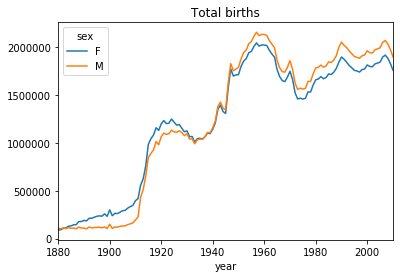

In [7]:
total_births.plot(title='Total births')

In [8]:
# names에서 year, sex
# ex) Mary는 1880년에 태어난 여자아이들 중 전체에서 차지하는 비중이 얼마인지 조사?
def add_prop(group):
    # 구현
    births=group.births.sum()
    group['prop']=group.births/births
    return group
    
names=names.groupby(['year','sex']).apply(add_prop)
names.head(20)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [9]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1) # 그룹화한거에서 prop의 합계가 1에 근사한지?

True

In [10]:
# 각 연도별, 성별에 따른 이름 빈도수가 가장 높은 이름을 1000개씩 추출
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)
top1000
# 그룹 인덱스 제거
top1000.reset_index(inplace=True, drop=True)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
girs=top1000.loc[top1000.sex=='F']
boys=top1000.loc[top1000.sex=='M']

In [12]:
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df=boys[boys.year==2010]
prop_cumsum=df.sort_index(by='prop', ascending=False).prop.cumsum() # cumsum => 누적합
prop_cumsum.values.searchsorted(0.5) # 누적합이 0.5인 지점까지 이름 종류의 개수 

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


116

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


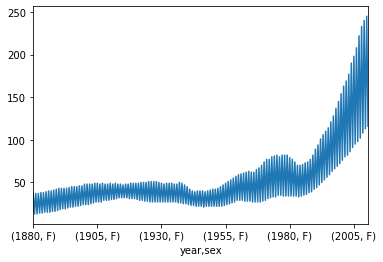

In [139]:
def get_qc(group, q=0.5):
    group=group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)

res=top1000.groupby(['year','sex']).apply(get_qc)
#res=res.unstack('sex') 
# res를 출력
res.plot()

In [140]:
res

year  sex
1880  F       37
      M       13
1881  F       37
      M       13
1882  F       37
            ... 
2008  M      108
2009  F      240
      M      113
2010  F      245
      M      116
Length: 262, dtype: int64

In [ ]:
"""
190, 1950, 2010년 성별로 구분 
이름을 구성하는 알파벳 문자 비율 조사
1900년 남자아이들 이름 
john 
michle 

1900년 남자아이들 이름에 가장 많이 사용된 알파벳 문자?
1950년 남자아이들 이름에 가장 많이 사용된 알파벳 문자?
2010년 남자아이들 이름에 가장 많이 사용된 알파벳 문자?

1900년 여자아이들 이름에 가장 많이 사용된 알파벳 문자?
1950년 여자아이들 이름에 가장 많이 사용된 알파벳 문자?
2010년 여자아이들 이름에 가장 많이 사용된 알파벳 문자?

"""

In [21]:
total_births=top1000.pivot_table('births', index='year',columns='name', aggfunc=np.sum)

In [22]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


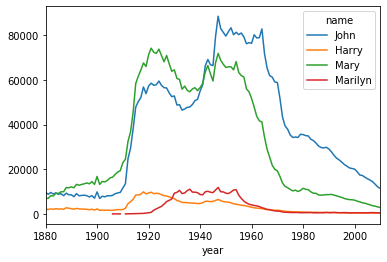

In [30]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000205A327AC88>,
      dtype=object)

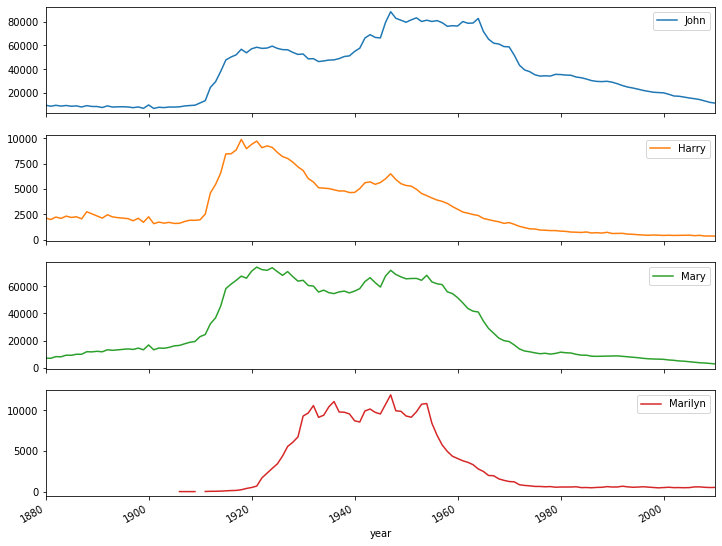

In [32]:
subset.plot(subplots=True, figsize=(12,10)) # 옵션으로 subplots = True 다 나눠서 출력하게 해줌

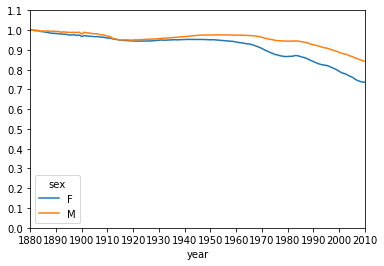

In [37]:
table=top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(yticks=np.linspace(0,1.1,12), xticks=range(1880,2011,10))

In [40]:
df=boys[boys.year==2010]

In [48]:
prop_cumsum=df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values # .values => array 형태로 출력
prop_cumsum.values.searchsorted(0.5)
# 117번째 아이의 이름에서 0.5(50%)가 됨

116

In [50]:
df=boys[boys.year==1900]

in1900=df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900[:10]
in1900.values # .values => array 형태로 출력
in1900.values.searchsorted(0.5)+1

25

In [64]:
top1000

def get_qc(group, q=0.5):
    group=group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

diversity=top1000.groupby(['year','sex']).apply(get_qc)
print(diversity)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64


In [65]:
diversity=diversity.unstack('sex') # sex 컬럼을 컬럼 인덱스로 주어서
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


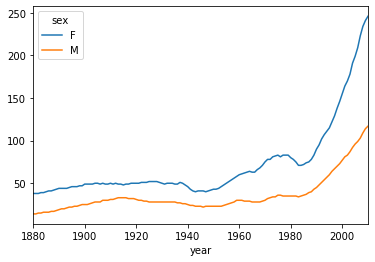

In [66]:
diversity.plot()

In [67]:
# 이름에 사용된 철자의 변화패턴?
# 상위 50% 이름들에 사용된 철자의 비율 조사
# 1889 - a:3%, z:0.1% ....
# 1890 - a:~~~
# ...
# 2010 - .....

In [80]:
# name 열에서 마지막 글자를 추출 
# 특정 기능을 수행하는 함수를 만들어야 하는 경우 => map 함수 쓰면 편함
# 함수자리에 람다를 많이 사용

print(names.name.map(lambda x:x[-1]))

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object


In [141]:
get_ln=lambda x:x[-1]
last_letters=names.name.map(get_ln)
last_letters.name='last_letter'
last_letters
table=names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [110]:
table # 1900년, 1950, 2010년
subtable=table.reindex(columns=[1900,1950,2010], level='year')
subtable.sum(axis=0)
letter_prop=subtable/subtable.sum(axis=0)

In [103]:
subtable.sum(axis=0)

# 1. 연습문제 1900년 남자아이, 여자아이의 전체 수 출력

sex  year
F    1900     299873.0
     1950    1713001.0
     2010    1759010.0
M    1900     150554.0
     1950    1789936.0
     2010    1898382.0
dtype: float64

In [104]:
import matplotlib.pyplot as plt

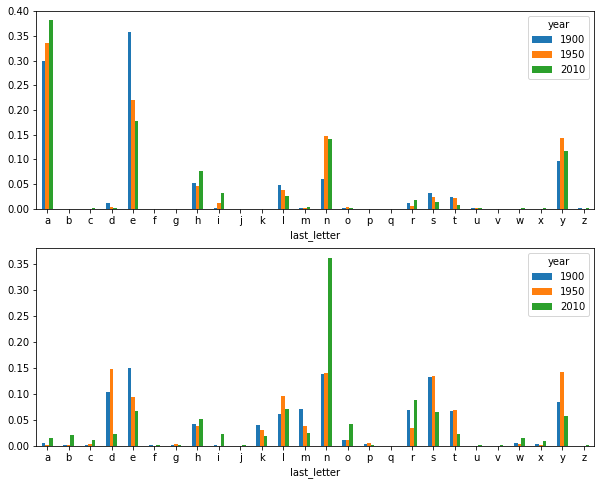

In [118]:
fig, axes=plt.subplots(2, 1, figsize=(10,8))

letter_prop['F'].plot(kind='bar', rot=0, ax=axes[0])
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[1])

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


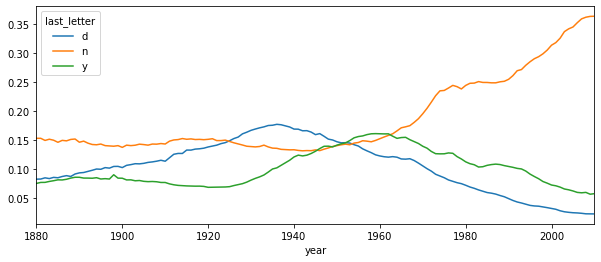

In [138]:
# d,n,y로 끝나는거에 대해서 
letter_prop=table/table.sum()
dny_ts=letter_prop.ix[['d','n','y'], 'M']
#letter_prop.loc[['d','n','y']]
dny_ts=dny_ts.T
dny_ts.plot(figsize=(10,4))
